In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("C:/Users/ajadhav/Downloads/df_la.csv")
df.drop(df.columns[0],axis=1,inplace=True)

In [2]:
df.shape

(2282, 45)

In [3]:
df.head()

,Year,ONS Code,LA Name,Region,Total Incidents,Highway Incidents,Footpath / Bridleway Incidents,Back Alleyway Incidents,Railway Incidents,Council Land Incidents,...,Car Boot or Less Clearance Costs (£),Small Van Load Incidents,Small Van Load Clearance Costs (£),Transit Van Load Incidents,Transit Van Load Clearance Costs (£),Tipper Lorry Load Incidents,Tipper Lorry Load Clearance Costs (£),Significant / Multi Loads Incidents,Sig / Multi Loads Clearance Costs (£),Total Incidents Clearance Costs (£)
0,2012-13,E07000223,Adur,South East,244.0,40.0,5.0,5.0,0.0,178.0,...,2958.0,54.0,3024.0,11.0,1265.0,0.0,0,0.0,0,9370.0
1,2012-13,E07000026,Allerdale,North West,811.0,158.0,108.0,216.0,1.0,96.0,...,5046.0,428.0,23968.0,51.0,5865.0,17.0,5950,11.0,3940,47879.0
2,2012-13,E07000032,Amber Valley,East Midlands,219.0,174.0,18.0,0.0,0.0,25.0,...,580.0,59.0,3304.0,31.0,3565.0,2.0,700,2.0,4000,15172.0
3,2012-13,E07000224,Arun,South East,716.0,248.0,78.0,36.0,0.0,50.0,...,4147.0,140.0,7840.0,37.0,4255.0,12.0,3851,3.0,1080,24503.0
4,2012-13,E07000170,Ashfield,East Midlands,477.0,205.0,115.0,33.0,0.0,62.0,...,4756.0,162.0,9072.0,43.0,4945.0,0.0,10,0.0,0,21037.0


In [4]:
num_cols = df._get_numeric_data().columns
cols = df.columns
list(set(cols) - set(num_cols))

['Year',
 'Region',
 'Sig / Multi Loads Clearance Costs (£)',
 'Tipper Lorry Load Clearance Costs (£)',
 'ONS Code',
 'LA Name']

In [5]:
from sklearn.preprocessing import LabelEncoder
le_region = LabelEncoder()
le_region.fit(df['Region'])
df['Region'] = le_region.transform(df['Region'])

In [6]:
le_name = LabelEncoder()
le_name.fit(df['LA Name'])
df['LA Name'] = le_name.transform(df['LA Name'])

In [7]:
import re
df['Tipper Lorry Load Clearance Costs (£)'] = df['Tipper Lorry Load Clearance Costs (£)'].str.replace(r'\D', '')
df['Sig / Multi Loads Clearance Costs (£)'] = df['Sig / Multi Loads Clearance Costs (£)'].str.replace(r'\D', '')

In [8]:
df['Sig / Multi Loads Clearance Costs (£)'].fillna(0,inplace=True)
df['Sig / Multi Loads Clearance Costs (£)'] = df['Sig / Multi Loads Clearance Costs (£)'].astype(int)

df['Tipper Lorry Load Clearance Costs (£)'].fillna(0,inplace=True)
df['Tipper Lorry Load Clearance Costs (£)'] = df['Tipper Lorry Load Clearance Costs (£)'].astype(int)

In [9]:
newdf = df.drop(['Year','ONS Code'],axis=1)

In [10]:
newdf.fillna(0,inplace=True)

In [11]:
num_cols = newdf._get_numeric_data().columns
cols = newdf.columns
list(set(cols) - set(num_cols))

[]

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_df = pca.fit_transform(newdf)

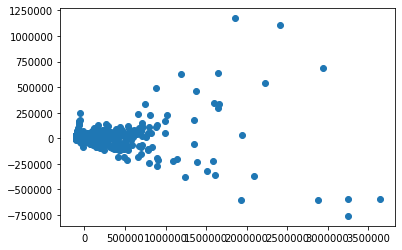

In [13]:
plt.scatter(pca_df[:,0], pca_df[:,1])

In [14]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,20) 
import numpy as np
from scipy.spatial.distance import cdist 
from sklearn.cluster import KMeans

for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(newdf) 
    kmeanModel.fit(newdf)     
      
    distortions.append(sum(np.min(cdist(newdf, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / newdf.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(newdf, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / newdf.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

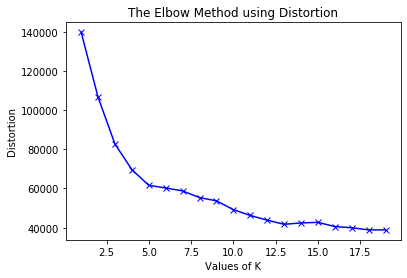

In [15]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show()

In [16]:
kmeans = KMeans(n_clusters=8, random_state=0).fit(newdf)
df['clusterLabels']= kmeans.labels_

In [17]:
pcadf = pd.DataFrame(pca_df)
pcadf['clusterLabels']= kmeans.labels_

In [18]:
pcadf.columns = ['x','y','clusterID']

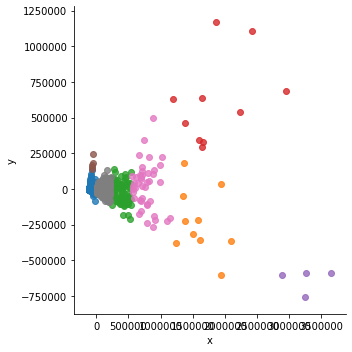

In [19]:
import seaborn as sns
 
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="x", y="y", data=pcadf, fit_reg=False, hue='clusterID', legend=False)


In [20]:
df['Region'] = le_region.inverse_transform(df['Region'])
df['LA Name'] = le_name.inverse_transform(df['LA Name'])

In [21]:
df.to_csv('Output.csv',index = False)